In [63]:
def read_fasta(file_path: str) -> str:
    """
    FASTA 파일에서 Chain A를 우선 선택하고, 없는 경우 가장 긴 체인 선택
    
    Args:
        file_path (str): FASTA 파일 경로
        
    Returns:
        str: 선택된 체인의 시퀀스
    """
    sequences = {}
    current_id = None
    current_sequence = []
    
    with open(file_path, 'r') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
                
            if line.startswith('>'):
                if current_id:
                    sequences[current_id] = ''.join(current_sequence)
                current_id = line[1:].split()[0]
                current_sequence = []
            else:
                current_sequence.append(line)
    
    if current_id:
        sequences[current_id] = ''.join(current_sequence)
    
    # search chain_A    
    chain_a = next((seq for id, seq in sequences.items() if id.endswith('_A')), None)
    longest_chain = max(sequences.items(), key=lambda x: len(x[1]))
    
    if chain_a and len(chain_a) >= 50:
        return chain_a
    else:
        longest_chain = max(sequences.items(), key=lambda x: len(x[1]))
        return longest_chain[1]

    # longest_chain = max(sequences.items(), key=lambda x: len(x[1]))
    # return longest_chain[1]



# 사용 예시
file_path = "data/sequence/CORE/1bcu_sequence.fasta"
selected_sequence = read_fasta(file_path)
print(f"Selected chain: {selected_sequence}")

Selected chain: IVEGSDAEIGMSPWQVMLFRKSPQELLCGASLISDRWVLTAAHCLLYPPWDKNFTENDLLVRIGKHSRTRYERNIEKISMLEKIYIHPRYNWRENLDRDIALMKLKKPVAFSDYIHPVCLPDRETAASLLQAGYKGRVTGWGNLKEGQPSVLQVVNLPIVERPVCKDSTRIRITDNMFCAGYKPDEGKRGDACEGDSGGPFVMKSPFNNRWYQMGIVSWGEGCDRDGKYGFYTHVFRLKKWIQKVIDQF



Sequence Length Statistics:
Total sequences: 4161
Mean length: 279.44
Median length: 255.00
Standard deviation: 160.22
Min length: 45
Max length: 1287


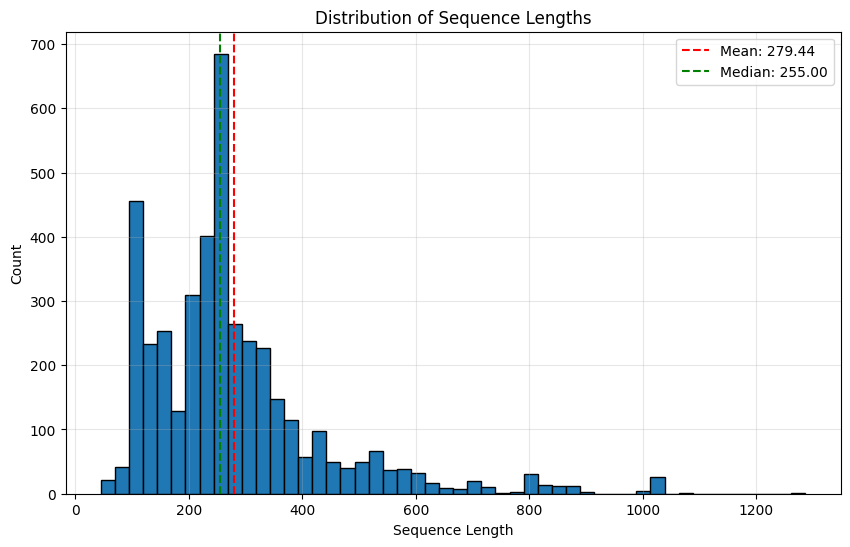

Length 0-50: 3 sequences (0.1%)
Length 51-200: 1156 sequences (27.8%)
Length 201-400: 2369 sequences (56.9%)
Length 401-600: 427 sequences (10.3%)
Length 601-800: 86 sequences (2.1%)
Length 801-1000: 70 sequences (1.7%)
Length 1001-1200: 32 sequences (0.8%)
Length 1201-inf: 1 sequences (0.0%)


In [64]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def analyze_sequence_lengths():
    # 모든 시퀀스 길이를 저장할 리스트
    lengths = []
    
    # 각 디렉토리별로 처리
    for st in ['Refined', 'CORE', 'CSAR']:
        dir_path = Path(f'data/sequence/{st}/')
        
        if not dir_path.exists():
            print(f"Directory not found: {dir_path}")
            continue
            
        for file in dir_path.glob('*.fasta'):
            try:
                sequence = read_fasta(str(file))
                lengths.append(len(sequence))
            except Exception as e:
                print(f"Error processing {file}: {e}")
                continue
    
    # 길이 분포 분석
    lengths = np.array(lengths)
    
    print(f"\nSequence Length Statistics:")
    print(f"Total sequences: {len(lengths)}")
    print(f"Mean length: {np.mean(lengths):.2f}")
    print(f"Median length: {np.median(lengths):.2f}")
    print(f"Standard deviation: {np.std(lengths):.2f}")
    print(f"Min length: {np.min(lengths)}")
    print(f"Max length: {np.max(lengths)}")
    
    # 히스토그램 그리기
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=50, edgecolor='black')
    plt.title('Distribution of Sequence Lengths')
    plt.xlabel('Sequence Length')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3)
    
    # 주요 통계치 표시
    plt.axvline(np.mean(lengths), color='r', linestyle='--', label=f'Mean: {np.mean(lengths):.2f}')
    plt.axvline(np.median(lengths), color='g', linestyle='--', label=f'Median: {np.median(lengths):.2f}')
    plt.legend()
    
    plt.show()
    
    # 길이 구간별 분포
    length_ranges = [(0, 50), (51, 200), (201, 400), (401, 600), (601, 800), (801, 1000), (1001, 1200), (1201, float('inf'))]
    for start, end in length_ranges:
        count = np.sum((lengths >= start) & (lengths < end))
        print(f"Length {start}-{end}: {count} sequences ({count/len(lengths)*100:.1f}%)")

# 실행
analyze_sequence_lengths()

In [65]:
from pathlib import Path

def find_shortest_sequence():
    shortest_length = float('inf')
    shortest_file = None
    shortest_sequence = None
    
    # 각 디렉토리별로 처리
    for st in ['Refined', 'CORE', 'CSAR']:
        dir_path = Path(f'data/sequence/{st}/')
        
        if not dir_path.exists():
            print(f"Directory not found: {dir_path}")
            continue
            
        for file in dir_path.glob('*.fasta'):
            try:
                sequence = read_fasta(str(file))
                seq_len = len(sequence)
                
                if seq_len < shortest_length:
                    shortest_length = seq_len
                    shortest_file = file
                    shortest_sequence = sequence
                    
            except Exception as e:
                print(f"Error processing {file}: {e}")
                continue
    
    if shortest_file:
        print(f"\nShortest sequence found in: {shortest_file}")
        print(f"Sequence length: {shortest_length}")
        print(f"Sequence: {shortest_sequence}")
    else:
        print("No sequences found")

# 실행
find_shortest_sequence()


Shortest sequence found in: data\sequence\Refined\3v2n_sequence.fasta
Sequence length: 45
Sequence: MDLAPQMLRELQETNAALQDVRELLRQQVKEITFLKNTVMECDAC


In [6]:
from utils.seq_to_graph import drug_to_graph

drug_to_graph(r'C:\Users\PARK\Desktop\GitHub\DTA_experiments\Raw\Refined\1mue\1mue_ligand.sdf', file=True)

In [8]:
from rdkit import Chem
Chem.MolFromMol2File(r'C:\Users\PARK\Desktop\GitHub\DTA_experiments\Raw\Refined\1mue\1mue_ligand.mol2')

In [ ]:
import torch
import pickle

file = r'C:\Users\PARK\Desktop\GitHub\A2H-Net\data\a2h\1a1e_vec.pkl'
def read_a2h(file, timesteps=5, all_atom=False, pad=True):
    if all_atom:
        max_len = 1370
    else: # only CA atom
        max_len = 136
    
    with open(file, 'rb') as f:
        data = pickle.load(f)
    
    apo = data['APO']
    holo = data['HOLO']

    result = []
    for a, h in zip(apo, holo):
        a_atom_name, a_res_name, a_res_seq, a_coord, a_element = a['atom_name'], a['res_name'], a['res_seq'], a['coord'], a['element']
        h_atom_name, h_res_name, h_res_seq, h_coord, h_element = h['atom_name'], h['res_name'], h['res_seq'], h['coord'], h['element']
        
        if not all_atom:
            if a_atom_name != 'CA':
                continue
        
        if (a_atom_name, a_res_name, a_res_seq) != (h_atom_name, h_res_name, h_res_seq):
            print('Wrong!!!')
            print(a_atom_name, a_res_name, a_res_seq)
            print(h_atom_name, h_res_name, h_res_seq)
            print()
        else:
            interpolation = [a_coord + (h_coord - a_coord) * (i / (timesteps - 1)) for i in range(timesteps)]
            result.append(interpolation)
    result = list(map(list, zip(*result)))
    result = torch.tensor(result)
    if pad:
        result = F.pad(result, (0, 0, 0, max_len - result.shape[1]))
    return result
        
tmp = read_a2h(file)

In [49]:
tmp.shape

torch.Size([5, 7, 3])

{'atom_name': 'CG2',
 'res_name': 'VAL',
 'chain_id': 'A',
 'res_seq': 44,
 'coord': array([38.839,  2.401, 42.887], dtype=float32),
 'b_factor': 0.0,
 'element': 'C'}

In [ ]:
data\ligand\Refined\1mue_ligand.mol2
data\ligand\Refined\1sl3_ligand.mol2
data\ligand\Refined\1ksn_ligand.mol2
data\ligand\Refined\4xtw_ligand.mol2
data\ligand\Refined\4kcx_ligand.mol2
data\ligand\Refined\1wc1_ligand.mol2
data\ligand\Refined\4xtx_ligand.mol2
data\ligand\Refined\4lhm_ligand.mol2
data\ligand\Refined\5tmp_ligand.mol2


In [24]:
import pickle

with open(r'cache\Refined_cv_splits.pkl', 'rb') as f:
    data = pickle.load(f)

for d in data:
    print('fold', d['fold'])
    print('train', d['train_codes'])
    print('val', d['val_codes'])
    # print('train', len(d['train_codes']))
    # print('val', len(d['val_codes']))
    print()

fold 0
train ['2w08', '1if8', '1k21', '3eeb', '4do5', '4jyc', '1g7g', '4a6l', '1v2s', '3w07', '1m7d', '1hwr', '2pvl', '3dd8', '2v59', '2nsl', '2cex', '1elb', '1xge', '4c2v', '3nu9', '4g5f', '2f7i', '2xyf', '3ozp', '4zyf', '2pwg', '2pbw', '4tln', '3p3t', '4qer', '3t82', '1nli', '1ui0', '4ibd', '4zhl', '3a5y', '4x8v', '4mss', '2izl', '1ocq', '3vhc', '4rd0', '3pn4', '4omc', '4q0k', '3adv', '3o5n', '4qfn', '2q54', '2nn7', '3rz8', '3hmp', '3rtf', '4xt2', '1kui', '1j01', '1qb6', '3bbf', '3nu4', '4bi6', '1nz7', '4a6b', '4azb', '4oks', '3k99', '4cps', '4zeb', '4nxv', '4cga', '1hdq', '1qyg', '2boj', '4j47', '2pwr', '4ibg', '4idn', '4cjq', '2e2r', '3zi8', '3t60', '1hvj', '3rz0', '1drv', '2h4k', '3pn1', '4j74', '1gj8', '1wuq', '1m0n', '2ca8', '2j34', '2psv', '4b1j', '4k5p', '4lov', '4qpd', '3n4b', '4q1x', '1txr', '4x5y', '3nhi', '2hnx', '4xtv', '1t4v', '4bck', '4io2', '1nny', '1qaw', '3upv', '4ck3', '2fxu', '2zkj', '2qnp', '3ejp', '1s5z', '4e3g', '3obx', '4jwk', '3fjg', '4rww', '3qxt', '1uou', '3

or
